# Create a DataFrame

包括： 1. 将字典创建为DataFrame，2. 提取行、列，3. 修改列名，4. 字符统计，5. 缺失值处理，6. 去重，计算，格式转换，7. 交换列位，8. 添加、删除数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 讲字典创建为DataFrame
data = {'grammer': ['Python', 'C', 'Java', 'GO', 'R', 'SQL', 'PHP', 'Python'],
       'Score': [1, 2, np.nan, 4, 5, 6, 7, 10]}
df = pd.DataFrame(data)
df

,grammer,Score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,R,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


In [6]:
# 提取含有Python的行
df[df['grammer'].str.contains('Python')]

,grammer,Score
0,Python,1.0
7,Python,10.0


In [8]:
# 提取列名
df.columns

Index(['grammer', 'Score'], dtype='object')

In [10]:
# 更改列名
df.rename(columns = {'Score':'Popularity'}, inplace = True)
# df.columns = ['Col1', 'Col2', 'Col3']

In [12]:
# 统计字符出现次数
df.grammer.value_counts()

Python    2
PHP       1
SQL       1
C         1
R         1
Java      1
GO        1
Name: grammer, dtype: int64

In [14]:
# 缺失值处理
df.Popularity = df.Popularity.fillna(df.Popularity.interpolate())
df.Popularity

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7    10.0
Name: Popularity, dtype: float64

In [31]:
# 数据提取
# df[df.Popularity > 3]
# df[(df.Popularity > 3) & (df.Popularity < 7)] # and
# df[(df.Popularity < 3) | (df.Popularity > 7)] # or
df.Popularity.max()

10.0

In [16]:
# 数据去重
df.drop_duplicates(['grammer'])

,grammer,Popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,R,5.0
5,SQL,6.0
6,PHP,7.0


In [17]:
# 数据计算
df.Popularity.mean()

4.75

In [18]:
# 转换为List
df.grammer.to_list()

['Python', 'C', 'Java', 'GO', 'R', 'SQL', 'PHP', 'Python']

In [ ]:
# 数据保存
df.to_excel("xx.xlsx")

In [21]:
# 数据行列查看
df.shape

(8, 2)

In [30]:
# 交换两列位置
# Option 1
'''temp = df['Popularity']
df.drop(labels = ['Popularity'], axis = 1, inplace = True)
df.insert(0, 'Popularity', temp)
df'''
# Option 2
cols = df.columns[[1,0]]
df = df[cols]
df

,Popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,R
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


In [33]:
# 数据修改 删除最后一行数据
df.drop([len(df)-1],inplace = True)

In [34]:
# 数据修改 添加一行数据
row = {'grammer': 'Perl', 'Popularity': 6.6}
df = df.append(row, ignore_index = True)
df

,Popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,R
5,6.0,SQL
6,6.6,Perl


In [37]:
# 数据整理 按照某列值 大小排序
df.sort_values('Popularity', inplace = True)

In [38]:
# 字符统计
df.grammer.map(lambda x: len(x))

0    6
1    1
2    4
3    2
4    1
5    3
6    4
Name: grammer, dtype: int64

# Data Processing

包括：1. 数据提取，iloc、loc的使用，2. str列转换成int及计算，3. 数据分组，4.查看数据类型，统计数据，5.可视化，6.删除列，合并列，7.最大最小值差，8.添加数据，9.设置索引，10.合并dataframe，11.缺失值处理，12.查看数据出现次数，13.按条件提取行

In [109]:
# .iloc：通过行、列号来选取数据 
# .loc
dt.iloc[0] # 第0行的数据  .loc[0:2] 前两行
dt.iloc[:,[1]] # 选取第二列
dt.iloc[0:1, [1]] # 选取某行某列
dt.iloc[0:1, [1,2]] # 选取多行多列
dt.iloc[np.where(x > 30000)[0][-3:], :] # 选取符合条件的倒数三行

dt.loc[0] # 选取第0行
dt.loc['0':'2'] # 选取多行
dt.loc[:,['education']] # 选取某列
dt.loc[:,['education','salary']] # 选取多列
dt.loc['2':'4',['education','salary']] #选取多行多列

In [193]:
# 读取数据 .xlsx : read_excel, .csv : read_csv
import re
dt = pd.read_excel('pandas120.xlsx')
# 在最后插入一列
dt.insert(3, 'Salary_AVG', None)
# 修改列名
dt = dt.rename(columns = {'createTime':'Date', 'education': 'Education', 'salary': 'Salary Range'})
# Salary列转换成max min的均值
for i in range(0,len(dt)):
    str1 = str(dt.iloc[i:i+1,[2]])
    k = re.findall(r"\d+\.?\d*", str1)
    avg = ((int(k[1]) + int(k[2]))/2)*1000
    dt.iloc[i:i+1,[3]] = avg
dt.head()

,Date,Education,Salary Range,Salary_AVG
0,2020-03-16 11:30:18,本科,20k-35k,27500
1,2020-03-16 10:58:48,本科,20k-40k,30000
2,2020-03-16 10:46:39,不限,20k-35k,27500
3,2020-03-16 10:45:44,本科,13k-20k,16500
4,2020-03-16 10:20:41,本科,10k-20k,15000


In [188]:
# 数据分组, String -> Integer
dt.Salary_AVG = dt.Salary_AVG.apply(int)
dt.groupby('Education').mean().round(2)

,Salary_AVG
Education,
不限,19600.00
大专,10000.00
本科,19361.34
硕士,20642.86


In [189]:
# 数值类型 汇总统计
dt.describe()

,Salary_AVG
count,135.000000
mean,19159.259259
std,8661.686922
min,3500.000000
25%,14000.000000
50%,17500.000000
75%,25000.000000
max,45000.000000


In [197]:
# 数值分组
bins = [0, 5000, 20000, 50000]
group_name = ['Low', 'Medium', 'High']
dt['Category'] = pd.cut(dt['Salary_AVG'], bins, labels = group_name)
dt.head()

,Date,Education,Salary Range,Salary_AVG,Category
0,2020-03-16 11:30:18,本科,20k-35k,27500,High
1,2020-03-16 10:58:48,本科,20k-40k,30000,High
2,2020-03-16 10:46:39,不限,20k-35k,27500,High
3,2020-03-16 10:45:44,本科,13k-20k,16500,Medium
4,2020-03-16 10:20:41,本科,10k-20k,15000,Medium


In [198]:
# 数据排列、整理
dt.sort_values('Salary_AVG', ascending = False).head()

,Date,Education,Salary Range,Salary_AVG,Category
53,2020-03-16 11:30:17,本科,30k-60k,45000,High
37,2020-03-16 11:04:00,本科,30k-50k,40000,High
101,2020-03-16 11:01:39,本科,30k-45k,37500,High
16,2020-03-16 10:36:57,本科,25k-50k,37500,High
131,2020-03-16 09:54:47,硕士,25k-50k,37500,High


In [199]:
# 提取33行数据
dt.loc[32]

Date            2020-03-16 10:07:25
Education                        硕士
Salary Range                15k-30k
Salary_AVG                    22500
Category                       High
Name: 32, dtype: object

In [202]:
#计算中位数
# np.median(dt['Salary_AVG'])
dt['Salary_AVG'].median()

17500.0

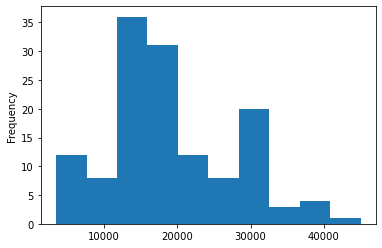

In [203]:
# 薪资水平频率分布图
dt['Salary_AVG'].plot(kind = 'hist')

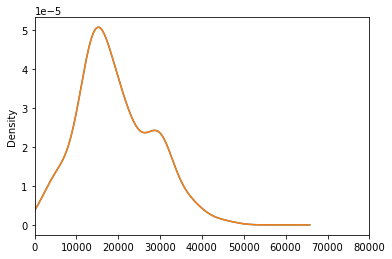

In [205]:
# 薪资水平密度曲线
dt['Salary_AVG'].plot(kind = 'kde')
dt['Salary_AVG'].plot(kind = 'kde', xlim = (0 , 80000))

In [210]:
# 合并列
dt['test'] = dt['Salary Range'] + dt['Education']

In [211]:
# 删除指定列
del dt['test']

In [213]:
# 合并int + str
dt['test'] = dt['Salary_AVG'].map(str) + dt['Salary Range']

In [219]:
# Salary 最大差
dt[['Salary_AVG']].apply(lambda x : max(x) - min(x))
# dt[['Salary_AVG']].apply(lambda x : x.max() - x.min())

Salary_AVG    41500.0
dtype: float64

In [221]:
# 将最后一行与第一行拼接, 显示两行
pd.concat([dt[:1], dt[-2:-1]])

,Date,Education,Salary Range,Salary_AVG,test
0,2020-03-16 11:30:18,本科,20k-35k,27500,27500.020k-35k
133,2020-03-16 10:46:31,本科,15k-23k,19000,19000.015k-23k


In [224]:
# 将X行数据添加至末尾，第X行数据仍会出现在本来位置
dt.append(dt.loc[7])

,Date,Education,Salary Range,Salary_AVG,test
0,2020-03-16 11:30:18,本科,20k-35k,27500,27500.020k-35k
1,2020-03-16 10:58:48,本科,20k-40k,30000,30000.020k-40k
2,2020-03-16 10:46:39,不限,20k-35k,27500,27500.020k-35k
3,2020-03-16 10:45:44,本科,13k-20k,16500,16500.013k-20k
4,2020-03-16 10:20:41,本科,10k-20k,15000,15000.010k-20k
...,...,...,...,...,...
131,2020-03-16 09:54:47,硕士,25k-50k,37500,37500.025k-50k
132,2020-03-16 10:48:32,本科,20k-40k,30000,30000.020k-40k
133,2020-03-16 10:46:31,本科,15k-23k,19000,19000.015k-23k
134,2020-03-16 11:19:38,本科,20k-40k,30000,30000.020k-40k


In [225]:
# 查看每一列的数据类型
dt.dtypes

Date            datetime64[ns]
Education               object
Salary Range            object
Salary_AVG              object
test                    object
dtype: object

In [227]:
# 将某列作为index
dt.set_index('Date')

,Education,Salary Range,Salary_AVG,test
Date,,,,
2020-03-16 11:30:18,本科,20k-35k,27500,27500.020k-35k
2020-03-16 10:58:48,本科,20k-40k,30000,30000.020k-40k
2020-03-16 10:46:39,不限,20k-35k,27500,27500.020k-35k
2020-03-16 10:45:44,本科,13k-20k,16500,16500.013k-20k
2020-03-16 10:20:41,本科,10k-20k,15000,15000.010k-20k
...,...,...,...,...
2020-03-16 11:36:07,本科,10k-18k,14000,14000.010k-18k
2020-03-16 09:54:47,硕士,25k-50k,37500,37500.025k-50k
2020-03-16 10:48:32,本科,20k-40k,30000,30000.020k-40k


In [228]:
# 生成一个与dt长度相同的随机数dataframe
dt1 = pd.DataFrame(pd.Series(np.random.randint(1,10,135)))
dt1.head()

,0
0,7
1,4
2,9
3,4
4,5


In [229]:
# 将dt1与dt合并
dt = pd.concat([dt, dt1], axis = 1)
dt.head()

,Date,Education,Salary Range,Salary_AVG,test,0
0,2020-03-16 11:30:18,本科,20k-35k,27500,27500.020k-35k,7
1,2020-03-16 10:58:48,本科,20k-40k,30000,30000.020k-40k,4
2,2020-03-16 10:46:39,不限,20k-35k,27500,27500.020k-35k,9
3,2020-03-16 10:45:44,本科,13k-20k,16500,16500.013k-20k,4
4,2020-03-16 10:20:41,本科,10k-20k,15000,15000.010k-20k,5


In [231]:
# 列相减
dt['New'] = dt['Salary_AVG'] - dt[0]
dt.head()

,Date,Education,Salary Range,Salary_AVG,test,0,New
0,2020-03-16 11:30:18,本科,20k-35k,27500,27500.020k-35k,7,27493
1,2020-03-16 10:58:48,本科,20k-40k,30000,30000.020k-40k,4,29996
2,2020-03-16 10:46:39,不限,20k-35k,27500,27500.020k-35k,9,27491
3,2020-03-16 10:45:44,本科,13k-20k,16500,16500.013k-20k,4,16496
4,2020-03-16 10:20:41,本科,10k-20k,15000,15000.010k-20k,5,14995


In [232]:
# 缺失值处理, 检查数据中是否含有任何缺失值
dt.isnull().values.any()

False

In [234]:
# 数据转换，将Salary_AVG 转换为float
dt.Salary_AVG.astype(np.float64).head()

0    27500.0
1    30000.0
2    27500.0
3    16500.0
4    15000.0
Name: Salary_AVG, dtype: float64

In [256]:
# 计算 salary>10000 的人数
len(dt[dt['Salary_AVG'] > 10000])

119

In [240]:
# 计算学历出现次数
dt['Education'].value_counts()

本科    119
硕士      7
不限      5
大专      4
Name: Education, dtype: int64

In [241]:
# 查看 education 共有几种学历
dt.Education.nunique()

4

In [255]:
# 提取salary_AVG 与 new之和大于60000的最后X行
dt1 = dt[['Salary_AVG', 'New']]
rowsums = dt1.apply(np.sum, axis = 1)
res = dt.iloc[np.where(rowsums > 60000)[0][-3:], :]
res.head()

,Date,Education,Salary Range,Salary_AVG,test,0,New
92,2020-03-16 10:41:20,本科,30k-40k,35000,35000.030k-40k,5,34995
101,2020-03-16 11:01:39,本科,30k-45k,37500,37500.030k-45k,1,37499
131,2020-03-16 09:54:47,硕士,25k-50k,37500,37500.025k-50k,5,37495


# Finance Data Processing

包括：1. 输出缺失值位置，2.删除缺失值，3.金融数据可视化，4.异常值处理，5.差价、变化率计算，6.数据滑动窗口计算(rolling，expanding)，7.数据重采样，8.数据按时间移动（前后X天），9.布林线绘制

In [319]:
fd = pd.read_excel('600000.SH.xls')
fd.head(2)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204


In [259]:
# 查看每列数据缺失情况
fd.isnull().sum()

代码           1
简称           2
日期           2
前收盘价(元)      2
开盘价(元)       2
最高价(元)       2
最低价(元)       2
收盘价(元)       2
成交量(股)       2
成交金额(元)      2
涨跌(元)        2
涨跌幅(%)       2
均价(元)        2
换手率(%)       2
A股流通市值(元)    2
总市值(元)       2
A股流通股本(股)    2
市盈率          2
dtype: int64

In [261]:
# 提取日期列含有空值的行
fd[fd['日期'].isnull()]

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
327,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,数据来源：Wind资讯,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
# 输出每列缺失值具体行数
for columname in fd.columns:
    if fd[columname].count() != len(fd):
        loc = fd[columname][fd[columname].isnull().values == True].index.tolist()
        print('列名："{}", 第{}行位置有缺失值'. format(columname, loc))

列名："代码", 第[327]行位置有缺失值
列名："简称", 第[327, 328]行位置有缺失值
列名："日期", 第[327, 328]行位置有缺失值
列名："前收盘价(元)", 第[327, 328]行位置有缺失值
列名："开盘价(元)", 第[327, 328]行位置有缺失值
列名："最高价(元)", 第[327, 328]行位置有缺失值
列名："最低价(元)", 第[327, 328]行位置有缺失值
列名："收盘价(元)", 第[327, 328]行位置有缺失值
列名："成交量(股)", 第[327, 328]行位置有缺失值
列名："成交金额(元)", 第[327, 328]行位置有缺失值
列名："涨跌(元)", 第[327, 328]行位置有缺失值
列名："涨跌幅(%)", 第[327, 328]行位置有缺失值
列名："均价(元)", 第[327, 328]行位置有缺失值
列名："换手率(%)", 第[327, 328]行位置有缺失值
列名："A股流通市值(元)", 第[327, 328]行位置有缺失值
列名："总市值(元)", 第[327, 328]行位置有缺失值
列名："A股流通股本(股)", 第[327, 328]行位置有缺失值
列名："市盈率", 第[327, 328]行位置有缺失值


In [269]:
# 缺失值处理
# axis：0-行操作（默认），1-列操作
# how：any-只要有空值就删除（默认），all-全部为空值才删除
# inplace：False-返回新的数据集（默认），True-在原数据集上操作
fd.dropna(axis = 0, how = 'any', inplace = True)
fd.tail()

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
322,600000.SH,浦发银行,2017-05-03,15.16,15.16,15.16,15.05,15.08,14247943,215130847,-0.08,-0.5277,15.0991,0.0659,3.260037e+11,3.260037e+11,2.161828e+10,6.1395
323,600000.SH,浦发银行,2017-05-04,15.08,15.07,15.07,14.90,14.98,19477788,291839737,-0.10,-0.6631,14.9832,0.0901,3.238418e+11,3.238418e+11,2.161828e+10,6.0988
324,600000.SH,浦发银行,2017-05-05,14.98,14.95,14.98,14.52,14.92,40194577,592160198,-0.06,-0.4005,14.7323,0.1859,3.225447e+11,3.225447e+11,2.161828e+10,6.0744
325,600000.SH,浦发银行,2017-05-08,14.92,14.78,14.90,14.51,14.86,43568576,638781010,-0.06,-0.4021,14.6615,0.2015,3.212476e+11,3.212476e+11,2.161828e+10,6.0500
326,600000.SH,浦发银行,2017-05-09,14.86,14.69,14.84,14.66,14.76,19225492,283864640,-0.10,-0.6729,14.765,0.0889,3.190858e+11,3.190858e+11,2.161828e+10,6.0093


C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy 

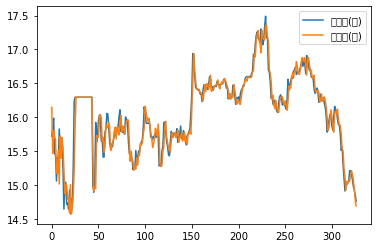

In [272]:
# 折线图，双变量
fd[['收盘价(元)', '开盘价(元)']].plot()

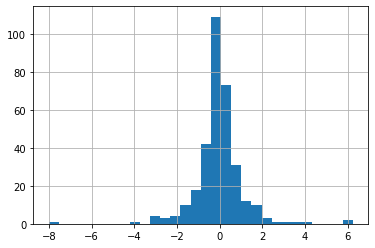

In [273]:
# 直方图
fd['涨跌幅(%)'].hist(bins = 30)

In [276]:
# 以data的列名创建一个新的dataframe
temp = pd.DataFrame(columns = fd.columns.to_list())
temp.head()

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率


In [280]:
# 打印换手率不是数字的行
for i in range(len(fd)):
    if type(fd.iloc[i,13]) != float:
        temp = temp.append(fd.loc[i])
temp.head(2)

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


In [283]:
# 打印换手率为--的行
fd[fd['换手率(%)'].isin(['--'])].head(2)

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


In [285]:
# 重置行号
fd.reset_index().head(2)

,index,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,1,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204


In [288]:
# 删除所有换手率为非数字的行
k = []
for i in range(len(fd)):
    if type(fd.iloc[i,13]) != float:
        k.append(i)
fd.drop(labels = k, inplace = True) 

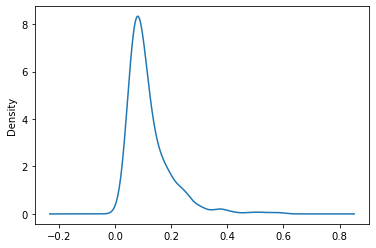

In [290]:
# 换手率密度曲线
fd['换手率(%)'].plot(kind = 'kde')

In [293]:
# 前一天与后一天的差价
fd['收盘价(元)'].diff().head(2)

0       NaN
1    0.1413
Name: 收盘价(元), dtype: float64

In [295]:
# 前一天与后一天收盘价变化率
fd['收盘价(元)'].pct_change().head(2)

0         NaN
1    0.008988
Name: 收盘价(元), dtype: float64

In [297]:
# 以5个数据作为滑动窗口，取均值, 5日均线
fd['收盘价(元)'].rolling(5).sum().head()

0        NaN
1        NaN
2        NaN
3        NaN
4    78.4789
Name: 收盘价(元), dtype: float64

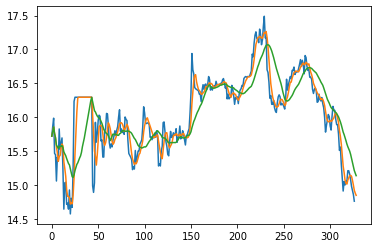

In [330]:
# 5日均线，20日均线
fd['收盘价(元)'].plot()
fd['收盘价(元)'].rolling(5, min_periods = 1).mean().plot()
fd['收盘价(元)'].rolling(20, min_periods = 1).mean().plot()

In [320]:
# 按周为采样规则，取一周收盘最大值,需要先将日期设为index
fd_1 = fd.set_index('日期')
fd_1['收盘价(元)'].resample('W').max()

日期
2016-01-10    15.9855
2016-01-17    15.8265
2016-01-24    15.6940
2016-01-31    15.0405
2016-02-07    16.2328
               ...   
2017-04-16    15.9700
2017-04-23    15.5600
2017-04-30    15.2100
2017-05-07    15.1600
2017-05-14    14.8600
Name: 收盘价(元), Length: 71, dtype: float64

C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


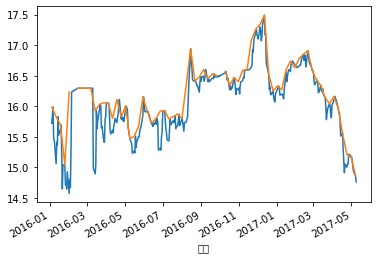

In [321]:
# 绘制重采样数据与原始数据
fd_1['收盘价(元)'].plot()
fd_1['收盘价(元)'].resample('7D').max().plot()

In [326]:
# 将数据往后/前移动5天
# fd_1.shift(5) # 向后移动
fd_1.shift(-5)  # 向前移动

In [328]:
# Expanding 函数，用于观察长期稳定性，计算方法：(a1 + a2 + ... + ni)/i
# 0: a1/1, 1: (a1+a2)/2, 2: (a1+a2+a3)/3
fd_1['开盘价(元)'].expanding(min_periods = 1).mean()

0      16.144400
1      15.804400
2      15.805867
3      15.784525
4      15.761120
         ...    
324    16.049159
325    16.045266
326    16.041122
327    16.041122
328    16.041122
Name: 开盘价(元), Length: 329, dtype: float64

C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\

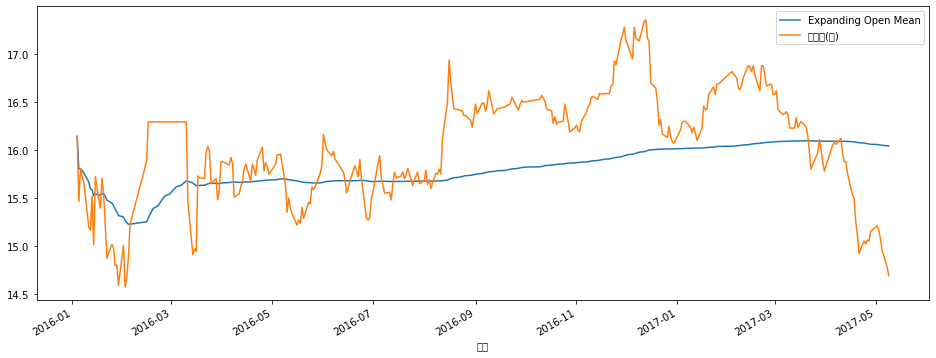

In [332]:
# 绘图
fd_1['Expanding Open Mean'] = fd_1['开盘价(元)'].expanding(min_periods = 1).mean()
fd_1[['Expanding Open Mean', '开盘价(元)']].plot(figsize = (16,6))

In [334]:
# 布林指标计算  中轨线=N日的移动平均线  上轨线=中轨线+两倍的标准差  下轨线=中轨线－两倍的标准差
fd_1['Former days rolling Close mean'] = fd_1['收盘价(元)'].rolling(20).mean()
fd_1['Upper Bound'] = fd_1['Former days rolling Close mean'] + 2 * fd_1['收盘价(元)'].rolling(20).std()
fd_1['Lower Bound'] = fd_1['Former days rolling Close mean'] - 2 * fd_1['收盘价(元)'].rolling(20).std()

C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Tracy Qiu\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tracy Qiu\

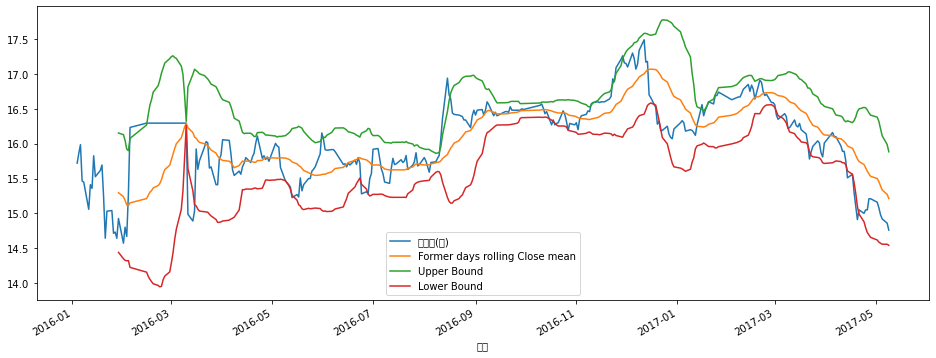

In [335]:
# 布林指标绘图
fd_1[['收盘价(元)', 'Former days rolling Close mean', 'Upper Bound', 'Lower Bound']].plot(figsize = (16,6))

# Numpy & Pandas

包括： 1. 随机生成数，固定步长，指定分布，2.查看最小值、25%分位数、中位数、75%分位数、最大值，3.提取某列中不在某列出现的值，4.出现频率最高的值，5.列的顺序颠倒，6.局部最大值，7.提取某位置的值，8.按行计算均值，9.移动平均值，10.修改int->str，11.Euclidean Distance

In [337]:
# 数据创建， 使用numpy生成20个0-100随机数
tem = np.random.randint(1, 100, 20)
df1 = pd.DataFrame(tem)
df1.head()

,0
0,47
1,39
2,78
3,69
4,45


In [338]:
# 固定步长
tem = np.arange(0, 100, 5)
df2 = pd.DataFrame(tem)
df2.head()

,0
0,0
1,5
2,10
3,15
4,20


In [340]:
# 正态分布
tem = np.random.normal(0, 1, 20)
df3 = pd.DataFrame(tem)
df3.head()

,0
0,2.364109
1,0.287067
2,0.608126
3,-0.343284
4,-0.358620


In [400]:
# 合并dataframe, 连接在后方
dff = pd.concat([df1, df2, df3], axis = 0, ignore_index = True) # 一列
dff = pd.concat([df1, df2, df3], axis = 1, ignore_index = True) # 三列
dff.head()

,0,1,2
0,47,0,2.364109
1,39,5,0.287067
2,78,10,0.608126
3,69,15,-0.343284
4,45,20,-0.358620


In [345]:
# 查看df所有数据的最小值，25%，中位数，75%，最大值
print(np.percentile(dff, q = [0, 25, 50, 75, 100]))

[-1.30147332  0.48935762 25.         61.75       96.        ]


In [401]:
dff.columns = ['col1', 'col2', 'col3']
# 提取第一列中没有在第二列出现的数字
dff['col1'][~dff['col1'].isin(dff['col2'])].head()

0    47
1    39
2    78
3    69
5    17
Name: col1, dtype: int32

In [349]:
# 提取第一列和第二列出现频率最高的三个数字
temp = dff['col1'].append(dff['col2'])
temp.value_counts().index[:3]

Int64Index([95, 17, 25], dtype='int64')

In [359]:
# 某列数字前后差值
dff['col1'].diff().tolist()

[nan,
 -8.0,
 39.0,
 -9.0,
 -24.0,
 -28.0,
 -1.0,
 -3.0,
 76.0,
 -64.0,
 62.0,
 9.0,
 -38.0,
 6.0,
 19.0,
 -22.0,
 34.0,
 -78.0,
 36.0,
 -12.0]

In [360]:
# 提取第一列位置在1，10的数字
dff['col1'].take([1, 10, 15])

1     39
10    87
15    61
Name: col1, dtype: int32

In [361]:
# 查找第一列的局部最大值：比前一个与后一个都大的数字
tem = np.diff(np.sign(np.diff(dff['col1'])))
np.where(tem == -2)[0] + 1

array([ 2,  8, 11, 14, 16, 18], dtype=int64)

In [364]:
# 按行计算每一行的均值
dff[['col1', 'col2', 'col3']].mean(axis = 1).head()

0    16.454703
1    14.762356
2    29.536042
3    27.885572
4    21.547127
dtype: float64

In [366]:
# 对某列计算移动平均值
np.convolve(dff['col2'], np.ones(3)/3, mode = 'valid')

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65.,
       70., 75., 80., 85., 90.])

In [402]:
# 将第一列大于50的数字修改为高
dff.head()
dff[['col4']] = dff[['col1']].astype(int)
dff.col4[dff['col4'] > 50]= '高'
dff.head()

C:\Users\Tracy Qiu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,col1,col2,col3,col4
0,47,0,2.364109,47
1,39,5,0.287067,39
2,78,10,0.608126,高
3,69,15,-0.343284,高
4,45,20,-0.358620,45


In [403]:
# 计算Euclidean distance
np.linalg.norm(dff['col1']-dff['col2'])

166.2197340871414

In [407]:
# 读取文件，仅包含指定列, 指定行数
dfff = pd.read_csv('数据1.csv', encoding = 'gbk', usecols = ['positionName', 'salary'], nrows = 10)
dfff

,positionName,salary
0,数据分析,37500
1,数据建模,15000
2,数据分析,3500
3,数据分析,45000
4,数据分析,30000
5,数据分析,50000
6,数据分析,30000
7,数据建模工程师,35000
8,数据分析专家,60000
9,数据分析师,40000


# Other

包括： 1.读取指定列数据，并更改 int-> str，显示所有列 2. 从df提取数据，3.小数点，百分数，4.第X大值得行号，5.合并数据，6.两列值相等的位置，7.拆分列，8.提取以“XX”开头的行，9.数据透视表，10.不同列相同计算法，不同列不同计算法，11.提取平均值最高的列

In [408]:
# 读取指定数据，将salary > 10000改为高
dfff = pd.read_csv('数据2.csv', converters = {'薪资水平': lambda x : '高' if float(x) > 10000 else '低'})
dfff.head()

,学历要求,薪资水平
0,本科,高
1,硕士,高
2,本科,低
3,本科,高
4,不限,高


In [410]:
# 数据计算，隔20行抽样
dfff.iloc[::20, :][['薪资水平']].head()

,薪资水平
0,高
20,高
40,高
60,高
80,高


In [428]:
# 科学计算法及百分数
df2 = pd.DataFrame(np.random.random(10) ** 10, columns = ['data'])
df2.round(3) # 取消科学计算法
df2_1 = df2.style.format({'data': '{0:.2%}'.format})# 百分数
df2_1

,data
0,29.05%
1,0.00%
2,0.01%
3,0.00%
4,0.00%
5,5.54%
6,0.00%
7,0.00%
8,0.00%
9,0.00%


In [430]:
# 查找第3大值的行号, 共10个数，index 0-9，第三大值index = 7
df2['data'].argsort()[::-1][7]
#[::-1][7]

2

In [432]:
# 反转行
df2.iloc[::-1, :]
# 反转列 ?
df2.iloc[:, ::-1]

,data
0,2.904585e-01
1,3.710943e-09
2,1.136003e-04
3,1.470864e-14
4,1.647847e-06
5,5.544502e-02
6,2.212202e-11
7,1.803413e-09
8,2.779813e-07
9,1.410084e-28


In [433]:
# 按照多列数据进行合并
df1= pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

df2= pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})
# default inner join
pd.merge(df1, df2, on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [437]:
# left join
pd.merge(df1, df2, how = 'left', on = ['key1', 'key2'])
# right join
pd.merge(df1, df2, how = 'right', on = ['key1', 'key2'])
# inner join
pd.merge(df1, df2, how = 'inner', on = ['key1', 'key2'])
# outer join
pd.merge(df1, df2, how = 'outer', on = ['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [439]:
# 显示全部列
dfff1 = pd.read_csv('数据1.csv', encoding = 'gbk')
pd.set_option('display.max.columns', None)
dfff1.head()

,positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,positionLables,industryLables,createTime,formatCreateTime,district,businessZones,salary,workYear,jobNature,education,positionAdvantage,imState,lastLogin,publisherId,approve,subwayline,stationname,linestaion,latitude,longitude,hitags,resumeProcessRate,resumeProcessDay,score,newScore,matchScore,matchScoreExplain,query,explain,isSchoolJob,adWord,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany
0,6802721,数据分析,475770,i/image2/M01/B7/3E/CgoB5lwPfEaAdn8WAABWQ0Jgl5s...,50-150人,"移动互联网,电商",A轮,"['绩效奖金', '带薪年假', '定期体检', '弹性工作']",产品|需求|项目类,数据分析,数据分析,"['SQL', '数据库', '数据运营', 'BI']","['电商', '社交', 'SQL', '数据库', '数据运营', 'BI']","['电商', '社交', 'SQL', '数据库', '数据运营', 'BI']",2020/3/16 11:00,11:00发布,余杭区,['仓前'],37500,1-3年,全职,本科,五险一金、弹性工作、带薪年假、年度体检,today,2020/3/16 11:00,12022406,1,NaN,NaN,NaN,30.278421,120.005922,NaN,50,1,233,0,15.101875,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
1,5204912,数据建模,50735,image1/M00/00/85/CgYXBlTUXeeAR0IjAABbroUk-dw97...,150-500人,电商,B轮,"['年终奖金', '做五休二', '六险一金', '子女福利']",开发|测试|运维类,数据开发,建模,"['算法', '数据架构']","['算法', '数据架构']",[],2020/3/16 11:08,11:08发布,滨江区,"['西兴', '长河']",15000,3-5年,全职,本科,"六险一金,定期体检,丰厚年终",disabled,2020/3/16 11:08,5491688,1,NaN,NaN,NaN,30.188041,120.201179,NaN,23,1,176,0,32.559414,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
2,6877668,数据分析,100125,image2/M00/0C/57/CgqLKVYcOA2ADcFuAAAE8MukIKA74...,2000人以上,"移动互联网,企业服务",上市公司,"['节日礼物', '年底双薪', '股票期权', '带薪年假']",产品|需求|项目类,数据分析,数据分析,"['数据库', '数据分析', 'SQL']","['数据库', 'SQL']",[],2020/3/16 10:33,10:33发布,江干区,"['四季青', '钱江新城']",3500,1-3年,全职,本科,五险一金 周末双休 不加班 节日福利,today,2020/3/16 10:33,5322583,1,4号线,江锦路,4号线_城星路;4号线_市民中心;4号线_江锦路,30.241521,120.212539,NaN,11,4,80,0,14.972357,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
3,6496141,数据分析,26564,i/image2/M01/F7/3F/CgoB5lyGAQGAZeI-AAAdOqXecnw...,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,[],['电商'],['电商'],2020/3/16 10:10,10:10发布,江干区,NaN,45000,3-5年,全职,本科,年终奖等,threeDays,2020/3/16 10:10,9814560,1,1号线,文泽路,1号线_文泽路,30.299404,120.350304,NaN,100,1,68,0,12.874153,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],True
4,6467417,数据分析,29211,i/image2/M01/77/B8/CgoB5l1WDyGATNP5AAAlY3h88SY...,2000人以上,物流丨运输,上市公司,"['技能培训', '免费班车', '专项奖金', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,"['BI', '数据分析', '数据运营']","['BI', '数据运营']",[],2020/3/16 09:56,09:56发布,余杭区,['仓前'],30000,3-5年,全职,大专,五险一金,disabled,2020/3/16 09:56,6392394,1,NaN,NaN,NaN,30.282952,120.009765,NaN,20,1,66,0,12.755375,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],True


In [441]:
# 查找 某两列 值相等的行号
np.where(dfff1.secondType == dfff1.thirdType)

(array([  0,   2,   4,   5,   6,  10,  14,  23,  25,  27,  28,  29,  30,
         33,  37,  38,  39,  40,  41,  48,  49,  52,  53,  55,  57,  61,
         65,  66,  67,  71,  73,  74,  75,  79,  80,  82,  85,  88,  89,
         91,  96, 100], dtype=int64),)

In [446]:
# 某列开根号
dfff1[['salary']].apply(np.sqrt).head()

,salary
0,193.649167
1,122.474487
2,59.160798
3,212.132034
4,173.205081


In [449]:
# 拆分列
dfff1['split'] = dfff1['linestaion'].str.split('_')
dfff1.head()

,positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,positionLables,industryLables,createTime,formatCreateTime,district,businessZones,salary,workYear,jobNature,education,positionAdvantage,imState,lastLogin,publisherId,approve,subwayline,stationname,linestaion,latitude,longitude,hitags,resumeProcessRate,resumeProcessDay,score,newScore,matchScore,matchScoreExplain,query,explain,isSchoolJob,adWord,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany,split
0,6802721,数据分析,475770,i/image2/M01/B7/3E/CgoB5lwPfEaAdn8WAABWQ0Jgl5s...,50-150人,"移动互联网,电商",A轮,"['绩效奖金', '带薪年假', '定期体检', '弹性工作']",产品|需求|项目类,数据分析,数据分析,"['SQL', '数据库', '数据运营', 'BI']","['电商', '社交', 'SQL', '数据库', '数据运营', 'BI']","['电商', '社交', 'SQL', '数据库', '数据运营', 'BI']",2020/3/16 11:00,11:00发布,余杭区,['仓前'],37500,1-3年,全职,本科,五险一金、弹性工作、带薪年假、年度体检,today,2020/3/16 11:00,12022406,1,NaN,NaN,NaN,30.278421,120.005922,NaN,50,1,233,0,15.101875,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
1,5204912,数据建模,50735,image1/M00/00/85/CgYXBlTUXeeAR0IjAABbroUk-dw97...,150-500人,电商,B轮,"['年终奖金', '做五休二', '六险一金', '子女福利']",开发|测试|运维类,数据开发,建模,"['算法', '数据架构']","['算法', '数据架构']",[],2020/3/16 11:08,11:08发布,滨江区,"['西兴', '长河']",15000,3-5年,全职,本科,"六险一金,定期体检,丰厚年终",disabled,2020/3/16 11:08,5491688,1,NaN,NaN,NaN,30.188041,120.201179,NaN,23,1,176,0,32.559414,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
2,6877668,数据分析,100125,image2/M00/0C/57/CgqLKVYcOA2ADcFuAAAE8MukIKA74...,2000人以上,"移动互联网,企业服务",上市公司,"['节日礼物', '年底双薪', '股票期权', '带薪年假']",产品|需求|项目类,数据分析,数据分析,"['数据库', '数据分析', 'SQL']","['数据库', 'SQL']",[],2020/3/16 10:33,10:33发布,江干区,"['四季青', '钱江新城']",3500,1-3年,全职,本科,五险一金 周末双休 不加班 节日福利,today,2020/3/16 10:33,5322583,1,4号线,江锦路,4号线_城星路;4号线_市民中心;4号线_江锦路,30.241521,120.212539,NaN,11,4,80,0,14.972357,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,"[4号线, 城星路;4号线, 市民中心;4号线, 江锦路]"
3,6496141,数据分析,26564,i/image2/M01/F7/3F/CgoB5lyGAQGAZeI-AAAdOqXecnw...,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,[],['电商'],['电商'],2020/3/16 10:10,10:10发布,江干区,NaN,45000,3-5年,全职,本科,年终奖等,threeDays,2020/3/16 10:10,9814560,1,1号线,文泽路,1号线_文泽路,30.299404,120.350304,NaN,100,1,68,0,12.874153,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],True,"[1号线, 文泽路]"
4,6467417,数据分析,29211,i/image2/M01/77/B8/CgoB5l1WDyGATNP5AAAlY3h88SY...,2000人以上,物流丨运输,上市公司,"['技能培训', '免费班车', '专项奖金', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,"['BI', '数据分析', '数据运营']","['BI', '数据运营']",[],2020/3/16 09:56,09:56发布,余杭区,['仓前'],30000,3-5年,全职,大专,五险一金,disabled,2020/3/16 09:56,6392394,1,NaN,NaN,NaN,30.282952,120.009765,NaN,20,1,66,0,12.755375,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],True,NaN


In [453]:
# 提取industryField列 以‘数据’开头的行
dfff1[dfff1['industryField'].str.startswith('数据')].head()

,positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,positionLables,industryLables,createTime,formatCreateTime,district,businessZones,salary,workYear,jobNature,education,positionAdvantage,imState,lastLogin,publisherId,approve,subwayline,stationname,linestaion,latitude,longitude,hitags,resumeProcessRate,resumeProcessDay,score,newScore,matchScore,matchScoreExplain,query,explain,isSchoolJob,adWord,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany,split
8,6458372,数据分析专家,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,其他数据分析,"['数据分析', '数据运营']","['电商', '广告营销', '数据分析', '数据运营']","['电商', '广告营销', '数据分析', '数据运营']",2020/3/16 10:57,10:57发布,余杭区,NaN,60000,5-10年,全职,本科,六险一金、境内外旅游、带薪年假、培训发展,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.28185,120.01569,NaN,83,1,24,0,1.141952,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
10,6804629,数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,数据分析,['数据分析'],"['电商', '广告营销', '数据分析']","['电商', '广告营销', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,30000,不限,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.28185,120.01569,NaN,83,1,17,0,1.161869,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
13,6804489,资深数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,数据分析,['数据分析'],"['电商', '数据分析']","['电商', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,30000,3-5年,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.28185,120.01569,NaN,83,1,16,0,1.075559,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
21,6267370,数据分析专家,31544,image1/M00/00/48/CgYXBlTUXOaADKooAABjQoD_n1w50...,150-500人,数据服务,不需要融资,"['专业红娘牵线', '节日礼物', '技能培训', '岗位晋升']",开发|测试|运维类,数据开发,数据分析,"['数据挖掘', '数据分析']","['数据挖掘', '数据分析']",[],2020/3/16 11:16,11:16发布,滨江区,NaN,20000,5-10年,全职,本科,五险一金,today,2020/3/16 11:16,466738,1,4号线,中医药大学,4号线_中医药大学;4号线_联庄,30.18548,120.13932,NaN,43,1,7,0,1.290228,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,"[4号线, 中医药大学;4号线, 联庄]"
32,6804489,资深数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,数据分析,['数据分析'],"['电商', '数据分析']","['电商', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,37500,3-5年,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.28185,120.01569,NaN,83,1,16,0,1.075712,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN


In [456]:
# 按列制作数据透视表
pd.pivot_table(dfff1, values = ['salary', 'score'], index = 'companyId').head()

,salary,score
companyId,,
62,33333.333333,3.666667
329,18750.000000,3.500000
542,41250.000000,6.000000
593,32500.000000,12.000000
2474,21500.000000,0.000000


In [459]:
# 同时对salary，score两列进行计算
dfff1[['salary', 'score']].agg([np.sum, np.mean, np.min]).round(3)

,salary,score
sum,3331000.00,1335.000
mean,31723.81,12.714
amin,3500.00,0.000


In [461]:
# 对不同列进行不同的计算
dfff1.agg({'salary': np.sum, 'score': np.mean}).round(3)

salary    3331000.000
score          12.714
dtype: float64

In [462]:
# 计算并提取平均薪资最高的区
dfff1[['district', 'salary']].groupby(by = 'district').mean().sort_values('salary', ascending = False).head(1)

,salary
district,
萧山区,36250.0


In [ ]:
#获取数据的基本报告
import pandas_profiling
pandas_profiling.ProfileReport(data_clean)